In [8]:
! unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required libs

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/content')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Store data, label in lists

In [10]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [11]:
cur_path

'/content'

# Preprocessing the images

In [13]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))   #Goes inside the train folder and iterates all 43 classes
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [14]:
data = np.array(data)
labels = np.array(labels)

In [16]:
os.mkdir('training')

In [17]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [18]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [19]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [22]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [23]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 171s 171ms/step - loss: 2.1824 - accuracy: 0.4415 - val_loss: 0.6846 - val_accuracy: 0.8131
Epoch 2/20
981/981 [==============================] - 152s 155ms/step - loss: 0.7955 - accuracy: 0.7661 - val_loss: 0.2980 - val_accuracy: 0.9105
Epoch 3/20
981/981 [==============================] - 166s 169ms/step - loss: 0.5063 - accuracy: 0.8504 - val_loss: 0.1744 - val_accuracy: 0.9537
Epoch 4/20
981/981 [==============================] - 159s 162ms/step - loss: 0.4160 - accuracy: 0.8777 - val_loss: 0.1639 - val_accuracy: 0.9528
Epoch 5/20
981/981 [==============================] - 158s 161ms/step - loss: 0.3410 - accuracy: 0.8992 - val_loss: 0.0996 - val_accuracy: 0.9709
Epoch 6/20
981/981 [==============================] - 156s 159ms/step - loss: 0.3100 - accuracy: 0.9099 - val_loss: 0.0821 - val_accuracy: 0.9765
Epoch 7/20
981/981 [==============================] - 151s 154ms/step - loss: 0.3007 - accuracy: 0.9147 - val_loss: 0.1355 -

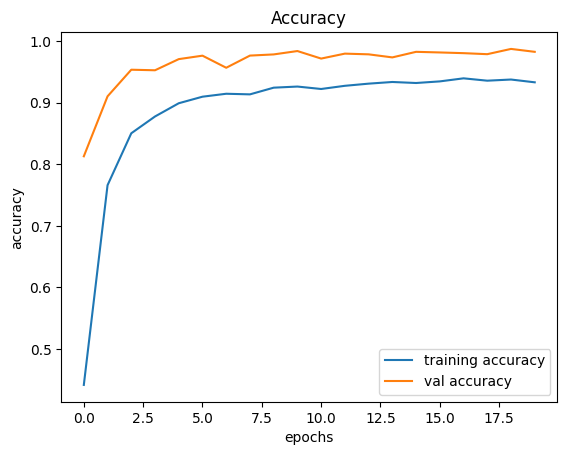

In [26]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

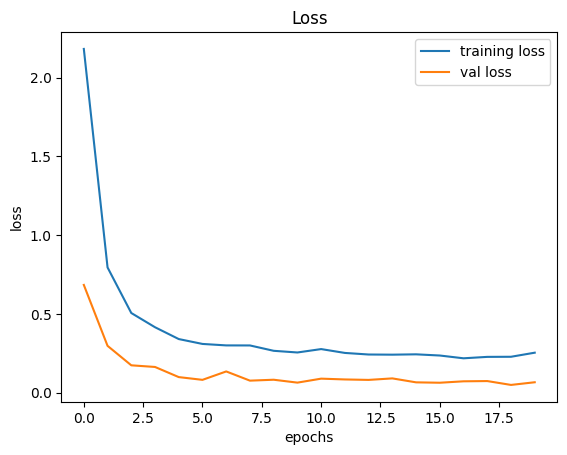

In [27]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [33]:
X_test, label = testing('./Training/Test.csv')

In [40]:
# Get the probabilities for each class
probabilities = model.predict(X_test)

# Convert probabilities to class labels
Y_pred = np.argmax(probabilities, axis=1)
Y_pred

395/395 [==============================] - 20s 51ms/step


array([16,  1, 38, ...,  5,  7, 10])

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9387965162311955


In [45]:
model.save("./training/TSR.keras")

In [43]:
# Save the model in the native Keras format
model.save('my_model')


In [44]:
!ls /content

drive			       meta	 my_model     Test	Train
gtsrb-german-traffic-sign.zip  Meta	 sample_data  Test.csv	Train.csv
kaggle.json		       Meta.csv  test	      train	training
